# Chapter 1

Examples and Exercises from Think Stats, 2nd Edition

http://thinkstats2.com

Copyright 2016 Allen B. Downey

MIT License: https://opensource.org/licenses/MIT


In [26]:
from os.path import basename, exists


def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + local)


download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkstats2.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkplot.py")

In [19]:
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/nsfg.py")

download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dct")
download(
    "https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dat.gz"
)

## Examples from Chapter 1

Read NSFG data into a Pandas DataFrame.

In [1]:
import nsfg

In [2]:
preg = nsfg.ReadFemPreg()
preg.head()

,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,...,laborfor_i,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw,totalwgt_lb
0,1,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,8.8125
1,1,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,7.8750
2,2,1,NaN,NaN,NaN,NaN,5.0,NaN,3.0,5.0,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,9.1250
3,2,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,7.0000
4,2,3,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,6.1875


Print the column names.

In [5]:
preg.columns

Index(['caseid', 'pregordr', 'howpreg_n', 'howpreg_p', 'moscurrp', 'nowprgdk',
       'pregend1', 'pregend2', 'nbrnaliv', 'multbrth',
       ...
       'laborfor_i', 'religion_i', 'metro_i', 'basewgt', 'adj_mod_basewgt',
       'finalwgt', 'secu_p', 'sest', 'cmintvw', 'totalwgt_lb'],
      dtype='object', length=244)

Select a single column name.

In [6]:
preg.columns[1]

'pregordr'

Select a column and check what type it is.

In [7]:
pregordr = preg['pregordr']
type(pregordr)

pandas.core.series.Series

Print a column.

In [8]:
pregordr

0        1
1        2
2        1
3        2
4        3
        ..
13588    1
13589    2
13590    3
13591    4
13592    5
Name: pregordr, Length: 13593, dtype: int64

Select a single element from a column.

In [9]:
pregordr[0]

1

Select a slice from a column.

In [10]:
pregordr[2:5]

2    1
3    2
4    3
Name: pregordr, dtype: int64

Select a column using dot notation.

In [11]:
pregordr = preg.pregordr

Count the number of times each value occurs.

In [12]:
preg.outcome.value_counts().sort_index()

outcome
1    9148
2    1862
3     120
4    1921
5     190
6     352
Name: count, dtype: int64

Check the values of another variable.

In [15]:
preg.birthwgt_lb.value_counts().sort_index()

birthwgt_lb
0.0        8
1.0       40
2.0       53
3.0       98
4.0      229
5.0      697
6.0     2223
7.0     3049
8.0     1889
9.0      623
10.0     132
11.0      26
12.0      10
13.0       3
14.0       3
15.0       1
Name: count, dtype: int64

Make a dictionary that maps from each respondent's `caseid` to a list of indices into the pregnancy `DataFrame`.  Use it to select the pregnancy outcomes for a single respondent.

In [4]:
caseid = 10229
preg_map = nsfg.MakePregMap(preg)
indices = preg_map[caseid]
preg.outcome[indices].values

array([4, 4, 4, 4, 4, 4, 1])

## Exercises

Select the `birthord` column, print the value counts, and compare to results published in the [codebook](ftp://ftp.cdc.gov/pub/Health_Statistics/NCHS/Dataset_Documentation/NSFG/Cycle6Codebook-Pregnancy.pdf)

In [5]:
preg['birthord'].sample(10)

8410     NaN
3125     NaN
1467     2.0
12213    2.0
7335     1.0
2426     1.0
11217    NaN
7333     3.0
8776     NaN
881      3.0
Name: birthord, dtype: float64

We can also use `isnull` to count the number of nans.

In [6]:
preg.birthord.isnull().sum()

4445

Select the `prglngth` column, print the value counts, and compare to results published in the [codebook](ftp://ftp.cdc.gov/pub/Health_Statistics/NCHS/Dataset_Documentation/NSFG/Cycle6Codebook-Pregnancy.pdf)

In [3]:
import polars as pl

In [4]:
preg_polars = pl.DataFrame(preg)

In [17]:
preg_polars.select(
    pl.col('prglngth').filter(pl.col('prglngth').is_in(
        range(0, 14))).count().alias('0-13'),
    pl.col('prglngth').filter(pl.col('prglngth').is_in(
        range(14, 27))).count().alias('14-26'),
    pl.col('prglngth').filter(pl.col('prglngth').is_in(
        range(27, 51))).count().alias('27-50')
)

0-13,14-26,27-50
u32,u32,u32
3522,793,9278


To compute the mean of a column, you can invoke the `mean` method on a Series.  For example, here is the mean birthweight in pounds:

In [18]:
preg.totalwgt_lb.mean()

7.265628457623368

Create a new column named <tt>totalwgt_kg</tt> that contains birth weight in kilograms.  Compute its mean.  Remember that when you create a new column, you have to use dictionary syntax, not dot notation.

In [24]:
preg_polars = preg_polars.with_columns(
    (pl.col('totalwgt_lb') * 0.45359237).alias('totalwgt_kg')
)

preg_polars['totalwgt_kg'].mean()

3.295633631632828

`nsfg.py` also provides `ReadFemResp`, which reads the female respondents file and returns a `DataFrame`:

In [27]:
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemResp.dct")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemResp.dat.gz")

In [28]:
resp = nsfg.ReadFemResp()

In [29]:
resp_polars = pl.DataFrame(resp)

In [30]:
resp_polars.sample(5)

caseid,rscrinf,rdormres,rostscrn,rscreenhisp,rscreenrace,age_a,age_r,cmbirth,agescrn,marstat,fmarstat,fmarit,evrmarry,hisp,hispgrp,numrace,roscnt,hplocale,manrel,fl_rage,fl_rrace,fl_rhisp,goschol,vaca,higrade,compgrd,havedip,dipged,cmhsgrad,havedeg,degrees,wthparnw,onown,intact,parmarr,lvsit14f,…,anyprghp_i,anymschp_i,infever_i,ovulate_i,tubes_i,infertr_i,inferth_i,advice_i,insem_i,invitro_i,endomet_i,fibroids_i,pidtreat_i,evhivtst_i,insuranc,metro,religion,laborfor,insuranc_i,metro_i,religion_i,laborfor_i,poverty,totincr,pubassis,poverty_i,totincr_i,pubassis_i,basewgt,adj_mod_basewgt,finalwgt,secu_r,sest,cmintvw,cmlstyr,screentime,intvlngth
i64,i64,i64,i64,i64,f64,i64,i64,i64,i64,i64,f64,i64,i64,i64,f64,i64,i64,f64,f64,i64,i64,i64,i64,f64,i64,f64,f64,f64,f64,f64,f64,i64,f64,f64,i64,f64,…,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,f64,f64,f64,i64,i64,i64,i64,str,f64
9042,1,5,3,5,5.0,30,30,871,30,4,null,3,1,5,null,1,3,null,null,0,0,0,5,null,12,5.0,5.0,null,null,null,null,2,5.0,5.0,1,1.0,…,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,1,2,1,0,0,0,0,200,8,2,0,0,0,2418.276797,2606.044684,4521.487527,2,58,1233,1221,"""19:06:53""",92.988
2279,1,5,2,5,4.0,34,34,810,34,1,null,1,1,5,null,1,2,1.0,1.0,0,0,0,5,null,19,1.0,1.0,1.0,1026.0,1.0,4.0,2,5.0,5.0,1,1.0,…,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,3,1,0,0,0,0,500,14,2,0,0,0,2818.211059,3047.271424,3961.757578,2,82,1228,1216,"""20:22:33""",83.540833
10591,5,1,3,5,5.0,21,21,969,21,6,null,5,0,5,null,1,3,null,null,0,0,0,1,1.0,15,1.0,1.0,1.0,1194.0,5.0,null,1,5.0,1.0,1,null,…,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,3,2,0,0,0,0,400,12,2,0,0,0,1806.827036,2121.162533,2983.839335,1,57,1229,1217,"""15:44:00""",29.708333
3109,1,5,3,5,5.0,36,36,800,36,1,null,1,1,5,null,1,4,1.0,1.0,0,0,0,1,5.0,13,5.0,1.0,1.0,977.0,5.0,null,2,1.0,5.0,1,1.0,…,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,3,7,0,0,0,0,128,7,2,0,0,0,18016.858364,21095.547963,38497.265477,1,51,1237,1225,"""22:03:20""",51.022167
2035,1,5,2,5,5.0,22,22,964,22,6,null,5,0,5,null,1,2,null,null,0,0,0,1,1.0,14,1.0,1.0,1.0,1182.0,5.0,null,2,5.0,1.0,1,null,…,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,1,1,3,0,0,0,0,500,14,2,0,0,0,3409.353217,3643.961477,5125.960609,1,21,1232,1220,"""12:05:17""",95.687


`DataFrame` provides a method `head` that displays the first five rows:

In [31]:
resp.head()

,caseid,rscrinf,rdormres,rostscrn,rscreenhisp,rscreenrace,age_a,age_r,cmbirth,agescrn,...,pubassis_i,basewgt,adj_mod_basewgt,finalwgt,secu_r,sest,cmintvw,cmlstyr,screentime,intvlngth
0,2298,1,5,5,1,5.0,27,27,902,27,...,0,3247.916977,5123.759559,5556.717241,2,18,1234,1222,18:26:36,110.492667
1,5012,1,5,1,5,5.0,42,42,718,42,...,0,2335.279149,2846.799490,4744.191350,2,18,1233,1221,16:30:59,64.294000
2,11586,1,5,1,5,5.0,43,43,708,43,...,0,2335.279149,2846.799490,4744.191350,2,18,1234,1222,18:19:09,75.149167
3,6794,5,5,4,1,5.0,15,15,1042,15,...,0,3783.152221,5071.464231,5923.977368,2,18,1234,1222,15:54:43,28.642833
4,616,1,5,4,1,5.0,20,20,991,20,...,0,5341.329968,6437.335772,7229.128072,2,18,1233,1221,14:19:44,69.502667


Select the `age_r` column from `resp` and print the value counts.  How old are the youngest and oldest respondents?

In [37]:
age_counts = resp_polars['age_r'].value_counts().sort(
    by='age_r', descending=True)

In [36]:
import seaborn as sns

In [41]:
age_counts.sample(10)

age_r,counts
i64,u32
28,252
43,253
42,215
23,282
21,267
26,260
32,273
24,269
29,262


/Users/victorteodoro/miniconda3/envs/ThinkStats2/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/victorteodoro/miniconda3/envs/ThinkStats2/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='age_r', ylabel='counts'>

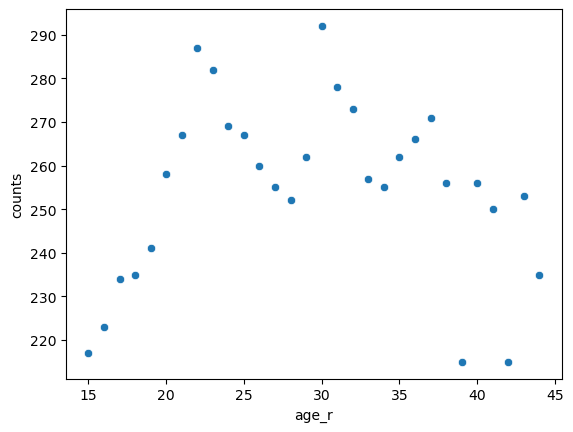

In [48]:
sns.scatterplot(x=age_counts['age_r'], y=age_counts['counts'])

We can use the `caseid` to match up rows from `resp` and `preg`.  For example, we can select the row from `resp` for `caseid` 2298 like this:

In [49]:
resp[resp.caseid == 2298]

,caseid,rscrinf,rdormres,rostscrn,rscreenhisp,rscreenrace,age_a,age_r,cmbirth,agescrn,...,pubassis_i,basewgt,adj_mod_basewgt,finalwgt,secu_r,sest,cmintvw,cmlstyr,screentime,intvlngth
0,2298,1,5,5,1,5.0,27,27,902,27,...,0,3247.916977,5123.759559,5556.717241,2,18,1234,1222,18:26:36,110.492667


And we can get the corresponding rows from `preg` like this:

In [50]:
preg[preg.caseid == 2298]

,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,...,laborfor_i,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw,totalwgt_lb
2610,2298,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3247.916977,5123.759559,5556.717241,2,18,NaN,6.8750
2611,2298,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3247.916977,5123.759559,5556.717241,2,18,NaN,5.5000
2612,2298,3,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3247.916977,5123.759559,5556.717241,2,18,NaN,4.1875
2613,2298,4,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3247.916977,5123.759559,5556.717241,2,18,NaN,6.8750


How old is the respondent with `caseid` 1?

In [54]:
resp_polars.select(pl.col('age_r').where(pl.col('caseid') == 1))

age_r
i64
44


In [61]:
ctx = pl.SQLContext(resps=resp_polars, eager_execution=True)

ctx.execute("select * from resps where caseid = 1")['age_r']

age_r
i64
44


In [63]:
resp_polars.filter(pl.col('caseid') == 1)['age_r']

age_r
i64
44


What are the pregnancy lengths for the respondent with `caseid` 2298?

In [66]:
preg_polars.filter(pl.col('caseid') == 2298)['wksgest']

wksgest
f64
40.0
36.0
30.0
40.0


What was the birthweight of the first baby born to the respondent with `caseid` 5012?

In [69]:
preg_polars.filter(pl.col('caseid') == 5012)['birthwgt_lb']

birthwgt_lb
f64
6.0
